In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

%matplotlib inline

In [2]:
PATH_RESULT = '../results'

In [3]:
path_y_true = os.path.join(PATH_RESULT, 'machine_learning_model', 'y_true.csv')
y_true = pd.read_csv(path_y_true, index_col=0, parse_dates=True, header=None)

In [4]:
path_y_pred_ml = os.path.join(PATH_RESULT, 'machine_learning_model', 'y_pred.csv')
y_pred_ml_model = pd.read_csv(path_y_pred_ml, index_col=0, parse_dates=True, header=None)

In [5]:
path_groups = os.path.join(PATH_RESULT, 'machine_learning_model', 'groups.npy')
groups_ride = np.load(path_groups)

In [6]:
y_true.columns = ['Power']
y_true.index.name = 'Timestamp'
y_pred_ml_model.columns = ['Power']
y_pred_ml_model.index.name = 'Timestamp'

In [7]:
groups_ride

array([  0,   0,   0, ..., 406, 406, 406])

In [8]:
from skcycling.metrics import normalized_power_score
from skcycling.metrics import intensity_factor_score
from skcycling.metrics import training_stress_score
from skcycling.metrics import training_load_score

In [9]:
mpa = 400

In [10]:
idx = np.unique(groups_ride)

In [11]:
np_score_true = []
if_score_true = []
ts_score_true = []
tl_score_true = []

np_score_estimated = []
if_score_estimated = []
ts_score_estimated = []
tl_score_estimated = []

for ride_idx in idx:
    mask = groups_ride == ride_idx
    # filtering
    power_true = y_true.iloc[mask, 0]
    power_estimated = y_pred_ml_model.iloc[mask, 0]
    # Compute the different metrics
    np_score_true.append(normalized_power_score(power_true, mpa))
    if_score_true.append(intensity_factor_score(power_true, mpa))
    ts_score_true.append(training_stress_score(power_true, mpa))
    tl_score_true.append(training_load_score(power_true, mpa))
    
    np_score_estimated.append(normalized_power_score(power_estimated, mpa))
    if_score_estimated.append(intensity_factor_score(power_estimated, mpa))
    ts_score_estimated.append(training_stress_score(power_estimated, mpa))
    tl_score_estimated.append(training_load_score(power_estimated, mpa))
    
np_score_true = np.array(np_score_true)
if_score_true = np.array(if_score_true)
ts_score_true = np.array(ts_score_true)
tl_score_true = np.array(tl_score_true)

np_score_estimated = np.array(np_score_estimated)
if_score_estimated = np.array(if_score_estimated)
ts_score_estimated = np.array(ts_score_estimated)
tl_score_estimated = np.array(tl_score_estimated)

In [12]:
# remove the NaN
mask = np.isfinite(np_score_estimated)

np_score_true = np_score_true[mask]
if_score_true = if_score_true[mask]
ts_score_true = ts_score_true[mask]
tl_score_true = tl_score_true[mask]

np_score_estimated = np_score_estimated[mask]
if_score_estimated = if_score_estimated[mask]
ts_score_estimated = ts_score_estimated[mask]
tl_score_estimated = tl_score_estimated[mask]

mask = np.isfinite(np_score_true)

np_score_true = np_score_true[mask]
if_score_true = if_score_true[mask]
ts_score_true = ts_score_true[mask]
tl_score_true = tl_score_true[mask]

np_score_estimated = np_score_estimated[mask]
if_score_estimated = if_score_estimated[mask]
ts_score_estimated = ts_score_estimated[mask]
tl_score_estimated = tl_score_estimated[mask]

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

In [14]:
def plot_scatter_regression(gt, pred, ax):  
    ax.scatter(gt, pred)
    ax.plot([gt.min(), gt.max()], [gt.min(), gt.max()], 'k--', lw=4)
    ax.set_xlabel('Measured', fontsize=16)
    ax.set_ylabel('Predicted', fontsize=16)
    r2 = r2_score(gt, pred)
    mae = median_absolute_error(gt, pred)
    ax.set_title('R2: {:.2f} - MAE: {:.2f}'.format(r2, mae), fontsize=18)
    
    # nice axis
    ax.set_ylim([gt.min(), gt.max()])
    ax.set_xlim([gt.min(), gt.max()])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

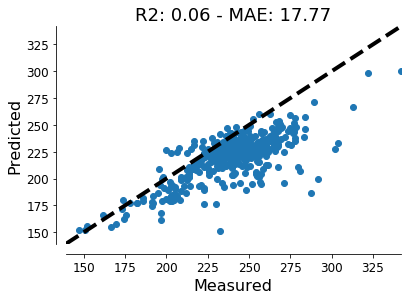

In [15]:
fig, ax = plt.subplots()
plot_scatter_regression(np_score_true, np_score_estimated, ax)

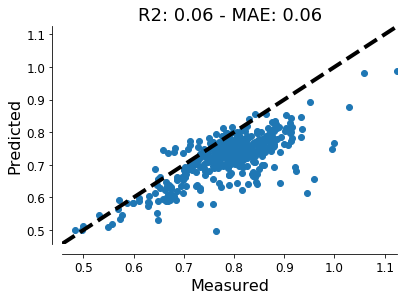

In [16]:
fig, ax = plt.subplots()
plot_scatter_regression(if_score_true, if_score_estimated, ax)

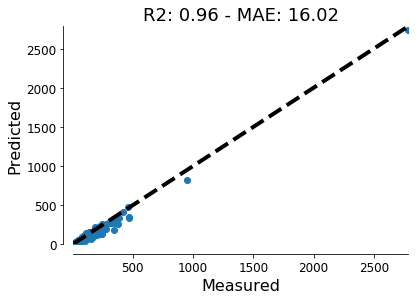

In [17]:
fig, ax = plt.subplots()
plot_scatter_regression(ts_score_true, ts_score_estimated, ax)

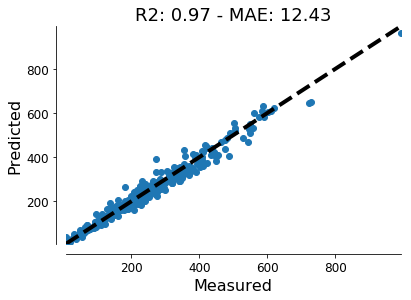

In [18]:
fig, ax = plt.subplots()
plot_scatter_regression(tl_score_true, tl_score_estimated, ax)